微分方程式を定義

In [17]:
import sympy as sy

alpha, beta, gamma = sy.symbols('alpha, beta, gamma')
p1, p2, p3, p4, p5, p6 = sy.symbols('p1, p2, p3, p4, p5, p6')
k_a_1, k_a_2, k_a_3, k_b_1, k_b_2, k_b_3 = sy.symbols('k_a_1, k_a_2, k_a_3, k_b_1, k_b_2, k_b_3')
n, F_G, F_E, V_G, V_I, I_B, H, h = sy.symbols('n, F_G, F_E, V_G, V_I, I_B, H, h')

G, Ii, Ip, Is, E, i = sy.symbols('G, Ii, Ip, Is, E, i')
FI = sy.Symbol('FI')
S = sy.Symbol('S')

dG = -i * k_a_2*G / (k_b_2 + G) \
    - (p1*i*G - H) \
        - (k_a_3*G / (k_b_3 + G)) \
            + (F_G + p5*p6*E)/V_G
dIi = p3*Ip - p2*Ii
dIp = alpha*(sy.Max(0, Is) + I_B) \
    - p3*Ip - p4*Ip + FI/V_I
dIs = beta*gamma*(G - h) - n*Is
dE = F_E - p5*E
di = S * (k_a_1*Ii / (k_b_1+Ii))

X = sy.Matrix([G, Ii, Ip, Is, E, i])
X_dot = sy.Matrix([dG, dIi, dIp, dIs, dE, di])
X_dot


Matrix([
[-G*i*k_a_2/(G + k_b_2) - G*i*p1 - G*k_a_3/(G + k_b_3) + H + (E*p5*p6 + F_G)/V_G],
[                                                                 -Ii*p2 + Ip*p3],
[                              FI/V_I - Ip*p3 - Ip*p4 + alpha*(I_B + Max(0, Is))],
[                                                     -Is*n + beta*gamma*(G - h)],
[                                                                    -E*p5 + F_E],
[                                                        Ii*S*k_a_1/(Ii + k_b_1)]])

In [18]:
# ヤコビ行列
Jacobian = X_dot.jacobian(X)
Jacobian

Matrix([
[G*i*k_a_2/(G + k_b_2)**2 + G*k_a_3/(G + k_b_3)**2 - i*k_a_2/(G + k_b_2) - i*p1 - k_a_3/(G + k_b_3),                                                  0,        0,                   0, p5*p6/V_G, -G*k_a_2/(G + k_b_2) - G*p1],
[                                                                                                 0,                                                -p2,       p3,                   0,         0,                           0],
[                                                                                                 0,                                                  0, -p3 - p4, alpha*Heaviside(Is),         0,                           0],
[                                                                                        beta*gamma,                                                  0,        0,                  -n,         0,                           0],
[                                                                                          

In [19]:
weight = 60
params = [
    (alpha, 0.5417),
    (beta, 1.0),
    (gamma, 0.1457),
    (p1, 0.1503),
    (p2, 0.1560),
    (p3, 0.1643),
    (p4, 0.1212),
    (p5, 0.5719),
    (p6, 0.2872),
    (k_a_1, 1.0),
    (k_a_2, 0.3746),
    (k_a_3, 0.3095),
    (k_b_1, 171.0552),
    (k_b_2, 94.4792),
    (k_b_3, 8.0479),
    (n, 5.9027), # 腎に関係するインスリン係数
    (F_G, 2.86*weight), # 注射器によるグルコース投入(1kg当たり2.86の投入)
    (F_E, 2.86*weight), # 経腸グルコース投入率(1kg当たり2.86の投入)
    (V_G, 1.88), # グルコース分布容量
    (V_I, 120.0),  # インスリン分布容量
    (I_B, 13.3909), # 基礎インスリン率
    (H, 0.7686), # 閾値1
    (h, 107.4),  # 閾値2
]

解く

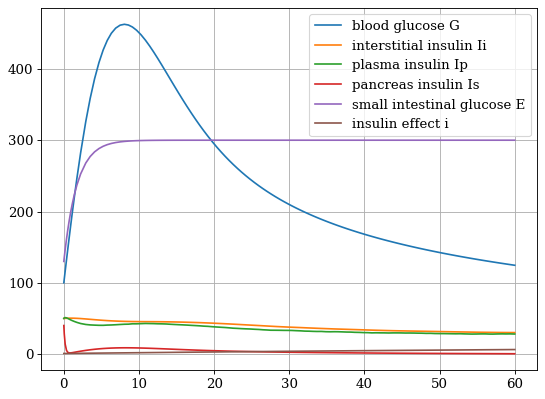

In [23]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.family"] = "DejaVu Serif"  # ubuntuにはTimes~が入っていない場合がある．そんときはこれ
plt.rcParams['font.size'] = 12  #フォントサイズ

_func_X_dot = sy.lambdify((G, Ii, Ip, Is, E, i, S, FI), X_dot.subs(params), "numpy")

def func_X_dot(t, X, sen, input):
    input = np.random.rand(1,1)[0,0]*100
    return _func_X_dot(X[0], X[1], X[2], X[3], X[4], X[5], sen, input).ravel()

X0 = np.array([100,50,50,40,130,0.8])

sol = integrate.solve_ivp(
    fun=func_X_dot,
    t_span=[0,60],
    y0=X0,
    args=(0.5, 200)
)

plt.figure(figsize=(8, 6), dpi=80)
plt.plot(sol.t, sol.y[0], label="blood glucose G")
plt.plot(sol.t, sol.y[1], label="interstitial insulin Ii")
plt.plot(sol.t, sol.y[2], label="plasma insulin Ip")
plt.plot(sol.t, sol.y[3], label="pancreas insulin Is")
plt.plot(sol.t, sol.y[4], label="small intestinal glucose E")
plt.plot(sol.t, sol.y[5], label="insulin effect i")
plt.grid()
plt.legend()
plt.show()